In [1]:
import pandas as pd

In [2]:
!pip install gensim==4.3.2 numpy==1.23.5 pandas==1.5.3

In [3]:
!pip install scipy==1.12

In [4]:
import gensim
import numpy
import scipy

In [5]:
print(gensim.__version__)
print(numpy.__version__)
print(scipy.__version__)

4.3.2
1.23.5
1.12.0


In [6]:
!pip install scikit-learn

In [7]:
# Charger le fichier et vérifier les colonnes.

In [8]:
df = pd.read_csv("clean_reviews_with_labels.csv")
df.head()

,firm,date_review,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,...,cons,status,experience,headline_clean,pros_clean,cons_clean,full_text_clean,text,sentiment,label
0,Apple,2008-01-31,5,3.0,5.0,3.0,4.0,4.0,v,v,...,You have to be careful because this job can ta...,current,No information,product poeple enjoy buy,people work great not imagine life will produc...,careful job life careful need learn seperate ...,product poeple enjoy buy. people work great no...,product poeple enjoy buy people work great not...,positive,1
1,Apple,2008-02-14,4,4.0,5.0,3.0,4.0,3.0,v,v,...,I suppose that a con would be that there is a ...,current,No information,different job different creative product work,big positive enjoy job apple innovative change...,suppose con hard balance work home life,different job different creative product work....,different job different creative product work ...,positive,1
2,Apple,2008-02-15,5,4.0,5.0,5.0,5.0,5.0,v,v,...,The people at Apple are living on the bleeding...,current,No information,work apple hard job love,work place like apple opportunity change way w...,people apple live bleed edge not know future h...,work apple hard job love. work place like appl...,work apple hard job love work place like apple...,positive,1
3,Apple,2008-04-20,5,5.0,5.0,5.0,4.0,5.0,v,v,...,"As part of their intensive training, there are...",current,No information,retail job altogether exciting thrilling life ...,despite fact boil sell product apple make feel...,intensive training mandatory meeting month pos...,retail job altogether exciting thrilling life ...,retail job altogether exciting thrilling life ...,positive,1
4,Apple,2008-04-20,2,3.0,5.0,2.0,3.0,1.0,x,x,...,Too much confidentiality. You couldn't even f...,former,No information,bad choice,benefit fulltime employee great stock option r...,confidentiality not fart get reprimand way fee...,bad choice. benefit fulltime employee great st...,bad choice benefit fulltime employee great sto...,negative,0


In [9]:
# Création des nouvelles colonnes tokenisées

In [10]:
# tokenisation preparation

In [11]:
def simple_tokenize(text):
    if pd.isnull(text):
        return []
    return text.lower().split()

df['proceeded_pros_clean'] = df['pros_clean'].apply(simple_tokenize)
df['proceeded_cons_clean'] = df['cons_clean'].apply(simple_tokenize)
df['proceeded_headline'] = df['headline_clean'].apply(simple_tokenize)

In [12]:
df.head()

,firm,date_review,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,...,headline_clean,pros_clean,cons_clean,full_text_clean,text,sentiment,label,proceeded_pros_clean,proceeded_cons_clean,proceeded_headline
0,Apple,2008-01-31,5,3.0,5.0,3.0,4.0,4.0,v,v,...,product poeple enjoy buy,people work great not imagine life will produc...,careful job life careful need learn seperate ...,product poeple enjoy buy. people work great no...,product poeple enjoy buy people work great not...,positive,1,"[people, work, great, not, imagine, life, will...","[careful, job, life, careful, need, learn, sep...","[product, poeple, enjoy, buy]"
1,Apple,2008-02-14,4,4.0,5.0,3.0,4.0,3.0,v,v,...,different job different creative product work,big positive enjoy job apple innovative change...,suppose con hard balance work home life,different job different creative product work....,different job different creative product work ...,positive,1,"[big, positive, enjoy, job, apple, innovative,...","[suppose, con, hard, balance, work, home, life]","[different, job, different, creative, product,..."
2,Apple,2008-02-15,5,4.0,5.0,5.0,5.0,5.0,v,v,...,work apple hard job love,work place like apple opportunity change way w...,people apple live bleed edge not know future h...,work apple hard job love. work place like appl...,work apple hard job love work place like apple...,positive,1,"[work, place, like, apple, opportunity, change...","[people, apple, live, bleed, edge, not, know, ...","[work, apple, hard, job, love]"
3,Apple,2008-04-20,5,5.0,5.0,5.0,4.0,5.0,v,v,...,retail job altogether exciting thrilling life ...,despite fact boil sell product apple make feel...,intensive training mandatory meeting month pos...,retail job altogether exciting thrilling life ...,retail job altogether exciting thrilling life ...,positive,1,"[despite, fact, boil, sell, product, apple, ma...","[intensive, training, mandatory, meeting, mont...","[retail, job, altogether, exciting, thrilling,..."
4,Apple,2008-04-20,2,3.0,5.0,2.0,3.0,1.0,x,x,...,bad choice,benefit fulltime employee great stock option r...,confidentiality not fart get reprimand way fee...,bad choice. benefit fulltime employee great st...,bad choice benefit fulltime employee great sto...,negative,0,"[benefit, fulltime, employee, great, stock, op...","[confidentiality, not, fart, get, reprimand, w...","[bad, choice]"


In [13]:
# S’assurer que les colonnes sont bien des listes de mots

In [14]:
print(df[['proceeded_pros_clean', 'proceeded_cons_clean', 'proceeded_headline']].head())

                                proceeded_pros_clean  \
0  [people, work, great, not, imagine, life, will...   
1  [big, positive, enjoy, job, apple, innovative,...   
2  [work, place, like, apple, opportunity, change...   
3  [despite, fact, boil, sell, product, apple, ma...   
4  [benefit, fulltime, employee, great, stock, op...   

                                proceeded_cons_clean  \
0  [careful, job, life, careful, need, learn, sep...   
1    [suppose, con, hard, balance, work, home, life]   
2  [people, apple, live, bleed, edge, not, know, ...   
3  [intensive, training, mandatory, meeting, mont...   
4  [confidentiality, not, fart, get, reprimand, w...   

                                  proceeded_headline  
0                      [product, poeple, enjoy, buy]  
1  [different, job, different, creative, product,...  
2                     [work, apple, hard, job, love]  
3  [retail, job, altogether, exciting, thrilling,...  
4                                      [bad, choice

In [15]:
# Fusionner toutes les phrases dans une seule liste

In [16]:
sentences = []

for col in ['proceeded_pros_clean', 'proceeded_cons_clean', 'proceeded_headline']:
    sentences.extend(df[col].tolist())

In [17]:
# 4. Entraîner le modèle Word2Vec
# Critères pour choisir la taille des vecteurs
# Corpus petit ou spécialisé : 
    # Privilégie des dimensions plus faibles (par exemple, 50 à 100). 
    # Cela limite le risque de surapprentissage et réduit le temps de calcul.

In [18]:
from gensim.models import Word2Vec

model = Word2Vec(
    sentences=sentences,
    vector_size=100,   # taille des vecteurs, à ajuster selon tes besoins
    window=5,          # fenêtre de contexte
    min_count=1,       # inclure tous les mots
    workers=4,         # nombre de threads
    sg=0               # 0 = CBOW, 1 = Skip-gram
)

In [19]:
vector = model.wv['salary']
print(vector)

[ 2.7343962  -2.8632197  -1.2210757  -0.31840226 -1.717275   -0.13560864
 -1.5350406  -1.7495149  -1.784157    0.45221847 -0.05939101 -0.88981354
  0.86792344 -0.5136917   0.09555698  1.4046146  -1.0013925  -0.94166183
  1.3651204  -2.097977   -3.2612576   0.21899603  1.2675124  -0.8378023
 -2.1373749  -0.7502742   0.16772334 -1.2842284  -0.411003    1.7661407
 -1.8172437   0.73527193  1.6671996   1.0509533   0.03936715  0.6193508
  0.667975   -0.66536117  0.07865395 -0.9469888   1.6248786  -0.73211414
  0.13825624  2.1110203  -2.4369643  -1.2272321  -1.6148548   0.19785878
  0.21251899 -1.9818028   0.1411983  -0.75211865  0.06302112  2.1167703
  0.74356616  0.1401343   2.0502622  -0.7404933   0.43436077 -0.7360692
 -1.7978388   2.5241036  -1.1940261   0.25467747 -0.6911589   0.03787015
 -0.36903548 -0.14995681 -1.1355137  -0.4257197   0.40580317  1.6358218
  1.6689045  -0.31865197  1.0754567  -0.03110897  0.97859716 -1.3443235
 -0.8038405   1.0601747   1.8461033  -0.5490657   0.043402

In [20]:
print(model.wv.most_similar('salary'))

[('pay', 0.8397101759910583), ('compensation', 0.8231690526008606), ('remuneration', 0.6698369383811951), ('payment', 0.6638637185096741), ('wage', 0.638071596622467), ('comp', 0.6312891244888306), ('package', 0.6081312894821167), ('payout', 0.5611981749534607), ('bonus', 0.5611231327056885), ('percentage', 0.5458980202674866)]


In [21]:
vector = model.wv['promotion']
print(vector)

[-0.2175651   1.616536    0.5137673   0.33018938 -2.1433609  -1.5234293
 -2.8177443  -3.7415988  -0.5376197   0.97802466 -1.3847669  -1.1556292
  0.8546812  -0.27293298 -1.4932426   0.30881277 -1.1676129  -2.87302
  2.7974565   0.48962104 -3.1405811   0.809067    0.86905634  1.4737978
 -2.3729293  -1.9457264  -1.7257246   0.79670167  0.4109019   0.14138372
 -0.9598537   0.89354783  0.2793416  -2.8142025   0.8135807   0.39621928
 -1.3250803  -0.8807608  -0.67646694 -0.6213183   0.74238986 -0.9468325
 -0.68828255  0.6596627   1.2789195  -2.015606   -2.4285388  -0.86426526
 -0.3602047  -2.0113752  -2.175574   -1.2008975   0.90941304 -0.38204038
 -1.2940445  -1.034416   -2.2150843   0.94380486 -1.622803    0.35171905
 -0.7735965   1.4523722  -0.5872305  -1.019316   -1.2802882  -2.2080774
  1.7043836  -0.6357673  -4.0466204   0.9905562   0.15544888  1.4979839
  2.0161505   0.5596724  -1.3481294   0.97846204  0.42295626 -0.55363476
 -0.44815645  1.4407636   1.3984746  -1.3213376   0.12538877

In [22]:
print(model.wv.most_similar('promotion'))

[('promotional', 0.6293888688087463), ('promote', 0.6250115036964417), ('merit', 0.6160308718681335), ('progression', 0.5977643132209778), ('merithorical', 0.5733152031898499), ('advancement', 0.5654081702232361), ('appraisal', 0.5605660080909729), ('seniority', 0.5564202666282654), ('promotegive', 0.5438629984855652), ('promo', 0.5356722474098206)]


In [23]:
vector = model.wv['openspace']
print(vector)

[-0.04053705 -0.07008301 -0.01009232 -0.04244239 -0.00642796  0.01297652
  0.079368    0.04856112  0.01641211 -0.0628781  -0.01855386 -0.07418684
 -0.04687699  0.04469099  0.05626391 -0.05243501 -0.04106448 -0.07135205
 -0.03623164 -0.03134438  0.03838618 -0.00268239  0.00282827 -0.01104254
  0.01272342 -0.00798486 -0.04345312  0.02919968  0.04654306  0.00630369
  0.10167501  0.03426054 -0.06661783  0.06717002 -0.01848906  0.00194579
 -0.0225968  -0.06976512 -0.05069437 -0.02172232 -0.01177905 -0.03576016
 -0.02585714  0.00601308  0.05972294 -0.04054811  0.00225333  0.01096791
 -0.00735794  0.06235734  0.00920602 -0.01618639  0.08647221 -0.02787115
 -0.05024599  0.0338137   0.05193484 -0.00951145 -0.00582363 -0.05596203
  0.00985876  0.00218901 -0.04841522 -0.06854349 -0.006562    0.04838802
 -0.01001589  0.01390903  0.04085093  0.00947544 -0.03622235  0.03389833
 -0.0115903  -0.01284545  0.03555226  0.01450064 -0.02220938  0.05061648
 -0.05481397  0.02648985 -0.01988119  0.04918872 -0

In [24]:
print(model.wv.most_similar('openspace'))

[('commons', 0.7217168807983398), ('juvenile', 0.7047130465507507), ('sterile', 0.700149416923523), ('dusty', 0.6958380937576294), ('watersnackscoffeestationary', 0.6927915215492249), ('goodmultiple', 0.6867937445640564), ('unclean', 0.6815924644470215), ('koolade', 0.6814480423927307), ('canary', 0.6808804273605347), ('wayprovide', 0.6804224848747253)]


In [25]:
model.save("word2vec_pros.model")

In [26]:
# Créer la colonne cible sentiment

In [27]:
df['sentiment'] = df['overall_rating'].apply(lambda x: 1 if x >= 3 else 0)

In [28]:
# Charger le modèle Word2Vec

In [29]:
model = Word2Vec.load("word2vec_pros.model")

In [30]:
# Transformer chaque colonne en vecteur

In [31]:
import numpy as np
def get_sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

df['vec_pros'] = df['proceeded_pros_clean'].apply(lambda x: get_sentence_vector(x, model))
df['vec_cons'] = df['proceeded_cons_clean'].apply(lambda x: get_sentence_vector(x, model))
df['vec_headline'] = df['proceeded_headline'].apply(lambda x: get_sentence_vector(x, model))

In [32]:
# Concaténer les vecteurs des trois colonnes

In [33]:
df['vector'] = df.apply(
    lambda row: np.concatenate([row['vec_pros'], row['vec_cons'], row['vec_headline']]),
    axis=1
)

In [34]:
# Préparer les données pour la régression logistique = créer X (features) et y (cible)

In [35]:
X = np.vstack(df['vector'].values)
y = df['sentiment'].values

In [36]:
# Diviser en train/test

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Standardiser les données

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
# entrainer la regression logistique

In [41]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [42]:
# Évaluer le modèle

In [51]:
df['sentiment'].value_counts(normalize=True)

1    0.810786
0    0.189214
Name: sentiment, dtype: float64

In [43]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8778325123152709
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.52      0.62      9947
           1       0.90      0.96      0.93     42833

    accuracy                           0.88     52780
   macro avg       0.82      0.74      0.77     52780
weighted avg       0.87      0.88      0.87     52780



In [44]:
# Classe 0 (minoritaire) :
    # Précision 0.75 : 75% des éléments prédits comme "0" sont effectivement des "0".
    # Rappel 0.52 : Le modèle retrouve 52% des vrais "0".
    # F1-score 0.61 : Moyenne harmonique entre précision et rappel.
    # Support 9947 : Nombre de vrais exemples de la classe 0.

# Classe 1 (majoritaire) :
    # Précision 0.90 : 90% des éléments prédits comme "1" sont effectivement des "1".
    # Rappel 0.96 : Le modèle retrouve 96% des vrais "1".
    # F1-score 0.93 : Excellente performance sur cette classe.
    # Support 42833 : Nombre de vrais exemples de la classe 1.

In [45]:
# Interprétation
    # Le modèle est très performant sur la classe majoritaire (1), mais a plus de mal à détecter la classe minoritaire (0).
    # Le rappel de la classe 0 est faible (0.52) : le modèle "rate" presque la moitié des vrais exemples de cette classe.
    # Déséquilibre des classes : la classe 1 est beaucoup plus représentée dans vos données (4 fois plus d'exemples que la classe 0), 
    # ce qui peut expliquer les performances déséquilibrées.

In [46]:
# Conseils pour amélioration
    # Si la classe 0 est importante (par exemple, détection de fraude, maladie, etc.), il serait pertinent :
    # D'équilibrer les classes (oversampling, undersampling, SMOTE, etc.)
    # D'ajuster le seuil de décision du modèle
    # D'utiliser des métriques plus adaptées (AUC-ROC, F1-score de la classe 0, etc.)
# Si la classe 1 est prioritaire, la performance est déjà très bonne.

In [47]:
# Résumé
    # Bonne accuracy globale (87,6%)
    # Excellente performance sur la classe majoritaire
    # Performance à améliorer sur la classe minoritaire si elle est importante pour votre cas d'usage

In [48]:
from sklearn.metrics import confusion_matrix

# y_test : vraies étiquettes
# y_pred : étiquettes prédites par votre modèle
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 5213  4734]
 [ 1714 41119]]


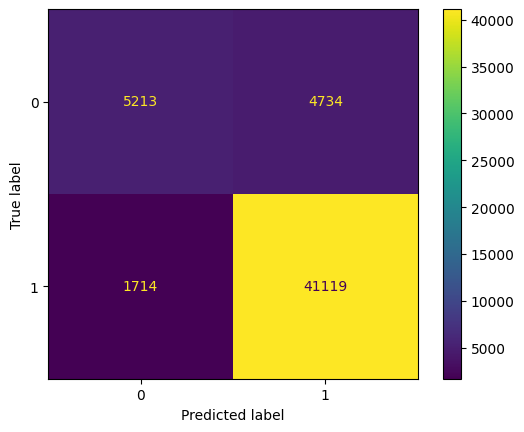

In [49]:
!pip install matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Affichage graphique
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [50]:
# AMELIORATIONS
# Il serait intéressant de recommencer en appliquant SMOTE
# SMOTE sert à générer des exemples synthétiques pour la classe minoritaire afin d’équilibrer les classes lors de l’entraînement du modèle